In [4]:
import pandas as pd
import numpy as np
import requests
import xmltodict
import seaborn as sns
import matplotlib.pyplot as plt
import time

### Load bowtie2 output for July 14th 2020

In [2]:
base_url = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/{}"
db = "taxonomy"

In [3]:
with open('July142020-ALL-R1.bowtie2') as f:
    lines = f.readlines()

In [6]:
%%time
df = pd.DataFrame({'taxon_id':[]})

for line in lines:
    line_split = line.split()
    line_split_array = line_split[1].split('_')
    tax_id = line_split_array[0]
    
    result = {'taxon_id': str(tax_id)}
    
    df = df.append(result, ignore_index = True)

CPU times: user 7.32 s, sys: 0 ns, total: 7.32 s
Wall time: 7.3 s


In [10]:
df.drop(index=df.index[-1],
          axis=0,
          inplace=True)

In [11]:
df.to_csv('01_July142020-ALL-R1-TaxaName.csv', index=False)

In [12]:
df = pd.read_csv('01_July142020-ALL-R1-TaxaName.csv')

In [14]:
df.head()

,taxon_id
0,54313
1,1387353
2,2014542
3,54313
4,54313


In [15]:
df.value_counts()

taxon_id
293939      1437
2014542      818
419435       510
54313        378
54           316
            ... 
1125847        1
1125965        1
1137096        1
1173027        1
61361935       1
Length: 312, dtype: int64

In [16]:
df.nunique()

taxon_id    312
dtype: int64

In [18]:
taxa_vcount = df['taxon_id'].value_counts()
df = pd.Series(taxa_vcount)
df.to_csv('02_July142020-ALL-R1-TaxaName.csv')

In [19]:
df = pd.read_csv('02_July142020-ALL-R1-TaxaName.csv')

In [21]:
df.columns.values[0] = "taxon_id"
df.columns.values[1] = "read_count"

In [23]:
df.to_csv('03_July142020-ALL-R1-TaxaName.csv', index=False)

In [24]:
df = pd.read_csv('03_July142020-ALL-R1-TaxaName.csv')

In [25]:
df.head()

,taxon_id,read_count
0,293939,1437
1,2014542,818
2,419435,510
3,54313,378
4,54,316


In [35]:
def ncbi_fetch(tax_id):
    try:
        efetch = "efetch.fcgi?db={}&id={}".format(db, tax_id)
        efetch_response = requests.get(base_url.format(efetch))
        efetch_dict = xmltodict.parse(efetch_response.content)
        ScientificName = efetch_dict['TaxaSet']['Taxon']['ScientificName']
        time.sleep(1)
    except:
        ScientificName = tax_id
        pass
 
    return ScientificName

def enrich_dataset(df):
    taxon_value = df['taxon_id']
    ScientificName = ncbi_fetch(taxon_value)

    df['taxon_name'] = ScientificName

    return df

In [36]:
%%time
df = df.apply(enrich_dataset, axis=1)

CPU times: user 8.84 s, sys: 405 ms, total: 9.24 s
Wall time: 7min 12s


In [37]:
df.to_csv('04_July142020-ALL-R1-TaxaName.csv', index=False)

In [5]:
df = pd.read_csv('04_July142020-ALL-R1-TaxaName.csv')

In [43]:
df.head()

,taxon_id,read_count,taxon_name
0,293939,1437,Aspergillus lentulus
1,2014542,818,Alcanivorax sp. N3-2A
2,419435,510,Glypta fumiferanae ichnovirus
3,54313,378,Tychonema bourrellyi
4,54,316,Nannocystis exedens


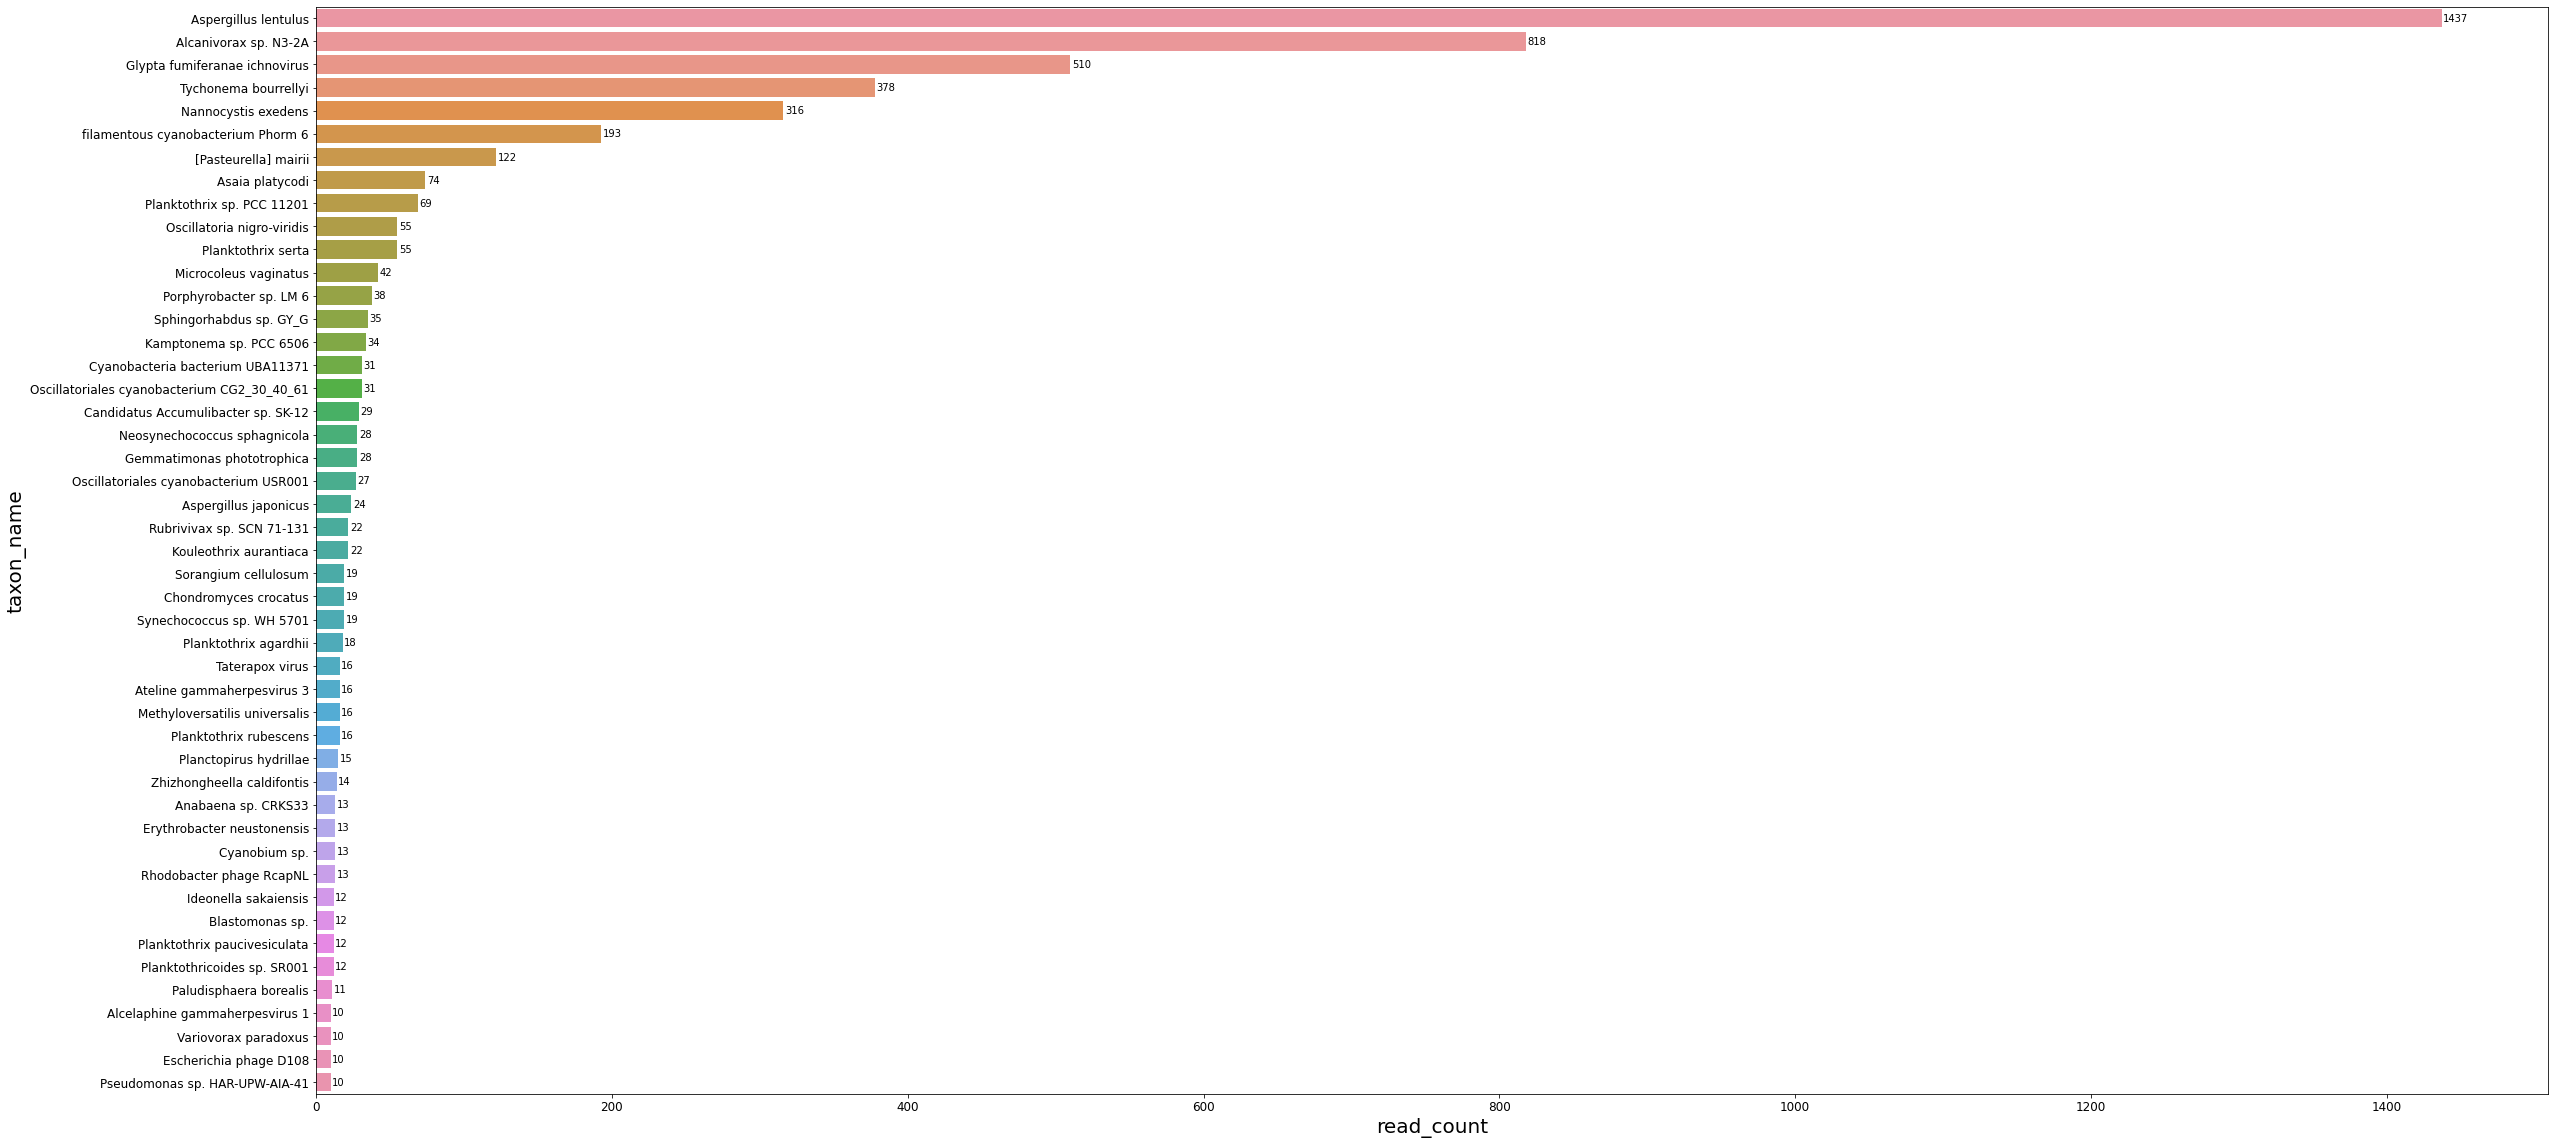

In [35]:
plt.figure(figsize = (40,20))
ax = sns.barplot(y='taxon_name', x='read_count', data=df[df['read_count'] >= 10])
ax.set_xlabel("read_count",fontsize=20)
ax.set_ylabel("taxon_name",fontsize=20)
ax.tick_params(axis='x', labelsize = 12)
ax.tick_params(axis='y', labelsize = 12)

for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center')
    
plt.savefig('July142020.jpeg', dpi=600)

### NCBI Scientific Name Lookup

In [41]:
def ncbi_fetch(tax_id):
    efetch = "efetch.fcgi?db={}&id={}".format(db, tax_id)
    efetch_response = requests.get(base_url.format(efetch))
    efetch_dict = xmltodict.parse(efetch_response.content)
    ScientificName = efetch_dict['TaxaSet']['Taxon']['ScientificName']
    
    return ScientificName

In [42]:
ncbi_fetch('2107706')

'filamentous cyanobacterium Phorm 6'